In [1]:
# import pandas
import pandas as pd

#import numpy
import numpy as np


#import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#creating Dataframe object
df = pd.read_csv('loan_pridiction.csv')
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df['Dependents']=df['Dependents'].replace('3+', 3)

In [8]:
df.isnull().sum(axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are null values present in column Gender,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History. To handle this we find mean and Mode method.

# LabelEncoder

In [9]:
df['Gender'] = df['Gender'].fillna(df['Gender'].dropna().mode().values[0] )
df['Married'] = df['Married'].fillna(df['Married'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].dropna().mode().values[0] )
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].dropna().mode().values[0] )
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].dropna().mean() )
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].dropna().mode().values[0] )
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].dropna().mode().values[0] )

In [10]:
df.isnull().sum(axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now there is no null values present.

Now we will replace the catagorical data of sex and Embarked column into numeric data.

In [11]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [17]:
#Import library:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
df['Gender']=le.fit_transform (df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Education']=le.fit_transform (df['Education'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])

In [18]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


# Making DataFrame for the Nominal Data

In [19]:
df_visualization_nominal=df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']].copy()

# Visualization of Data

for visualization of data we will use countplot method of seaborn.

In [20]:
import seaborn as sns

1    502
0    112
Name: Gender, dtype: int64


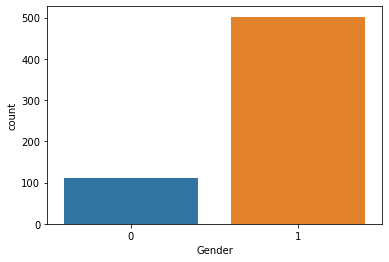

In [21]:
ax=sns.countplot(x="Gender",data=df_visualization_nominal)
print(df_visualization_nominal['Gender'].value_counts())

from the above observation the total number of male(0) is 112 and female is 502.

1    401
0    213
Name: Married, dtype: int64


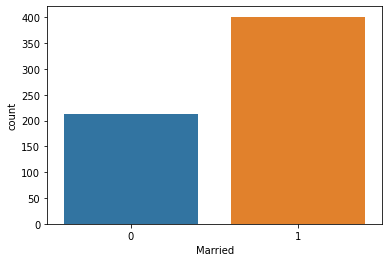

In [22]:
ax=sns.countplot(x="Married",data=df_visualization_nominal)
print(df_visualization_nominal['Married'].value_counts())

from the above observation the total number of Married person is 213 and Unmarried is 401.

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64


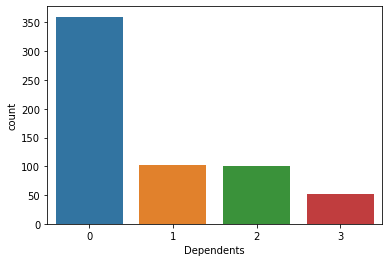

In [23]:
ax=sns.countplot(x="Dependents",data=df_visualization_nominal)
print(df_visualization_nominal['Dependents'].value_counts())

In total data 360 Persons has no dependency.

0    480
1    134
Name: Education, dtype: int64


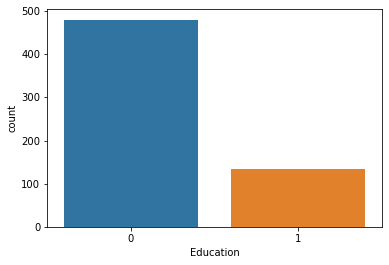

In [24]:
ax=sns.countplot(x="Education",data=df_visualization_nominal)
print(df_visualization_nominal['Education'].value_counts())

480 persons are Graduate and 134 are Non Graduate.

0    532
1     82
Name: Self_Employed, dtype: int64


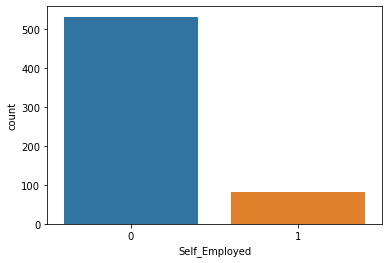

In [25]:
ax=sns.countplot(x="Self_Employed",data=df_visualization_nominal)
print(df_visualization_nominal['Self_Employed'].value_counts())

532 persons are not self employed and only 82 are employed.Credit_History', 'Property_Area', 'Loan_Status'

1.0    525
0.0     89
Name: Credit_History, dtype: int64


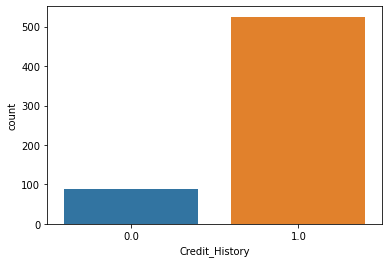

In [26]:
ax=sns.countplot(x="Credit_History",data=df_visualization_nominal)
print(df_visualization_nominal['Credit_History'].value_counts())

1    233
2    202
0    179
Name: Property_Area, dtype: int64


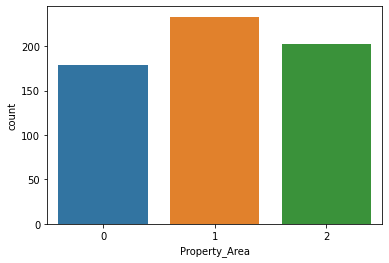

In [27]:
ax=sns.countplot(x="Property_Area",data=df_visualization_nominal)
print(df_visualization_nominal['Property_Area'].value_counts())


People from rural area are 179, from semirural is 233 and from urban is 202.

1    422
0    192
Name: Loan_Status, dtype: int64


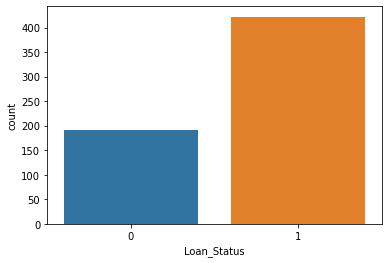

In [28]:
ax=sns.countplot(x="Loan_Status",data=df_visualization_nominal)
print(df_visualization_nominal['Loan_Status'].value_counts())

Persons whom loan are given is 422 and not given is 

More Loans are approved Vs Rejected

Count of Male applicants is more than Female

Count of Married applicant is more than Non-married

Count of graduate is more than non-Graduate

Count of self-employed is less than that of Non-Self-employed

Maximum properties are located in Semiurban areas

Credit History is present for many applicants

The count of applicants with several dependents=0 is maximum.

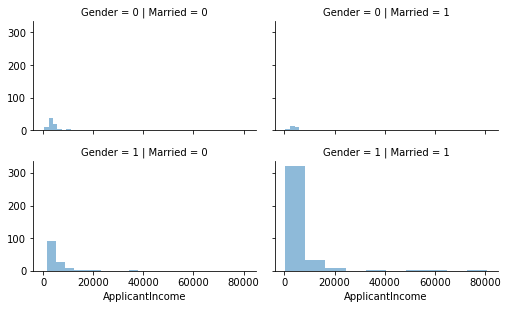

In [29]:
grid = sns.FacetGrid(df, row='Gender', col='Married', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

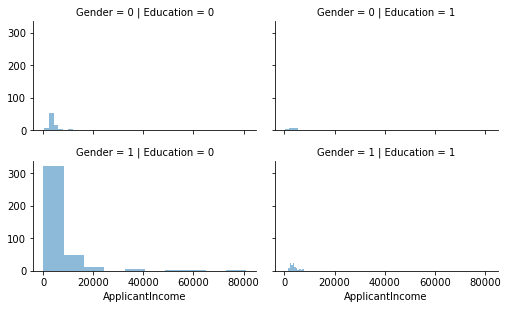

In [30]:
grid = sns.FacetGrid(df, row='Gender', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

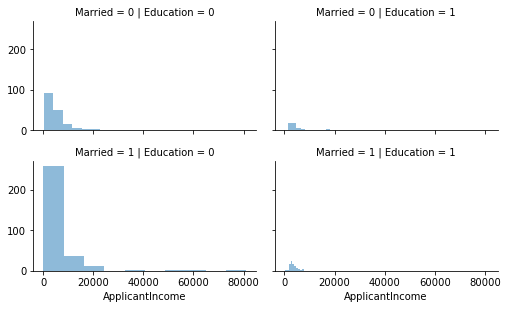

In [31]:
grid = sns.FacetGrid(df, row='Married', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

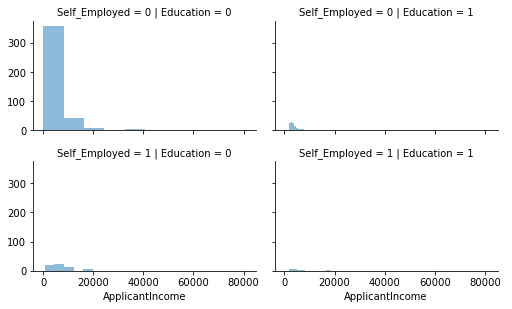

In [32]:
grid = sns.FacetGrid(df, row='Self_Employed', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

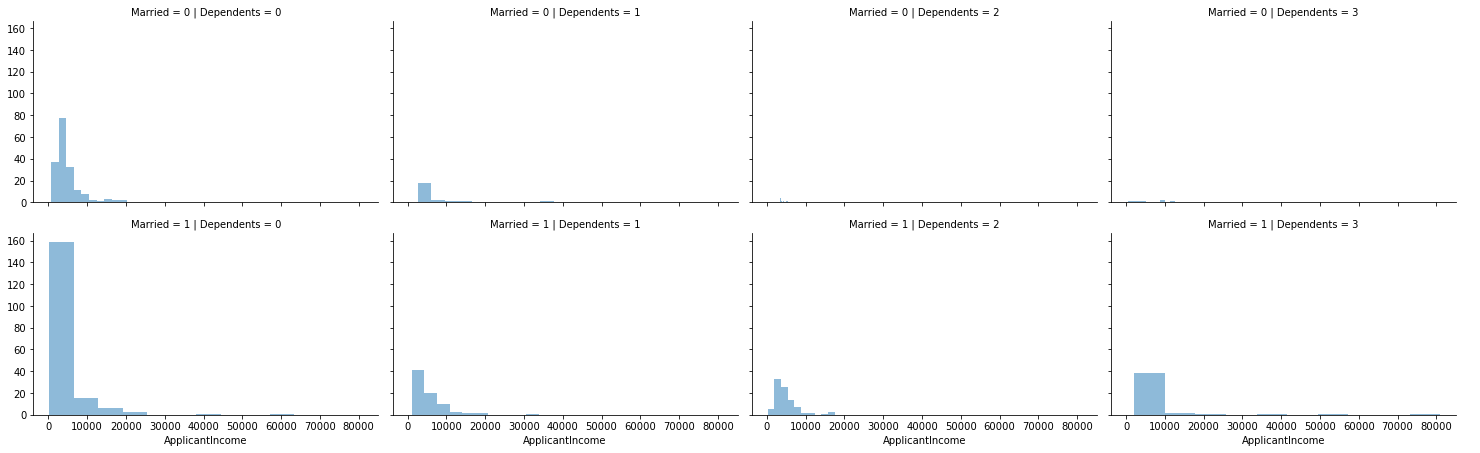

In [33]:
grid = sns.FacetGrid(df, row='Married', col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

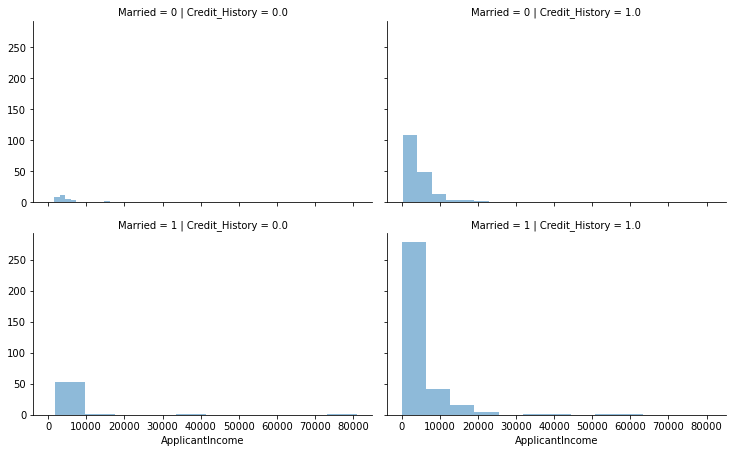

In [34]:
grid = sns.FacetGrid(df, row='Married', col='Credit_History', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

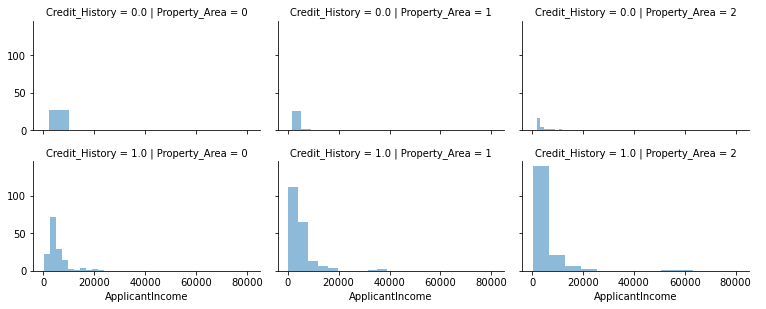

In [35]:
grid = sns.FacetGrid(df, row='Credit_History', col='Property_Area', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

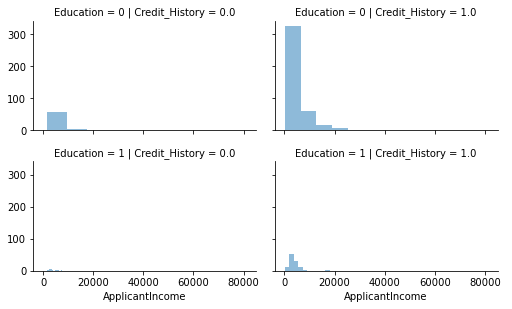

In [36]:
grid = sns.FacetGrid(df, row='Education', col='Credit_History', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

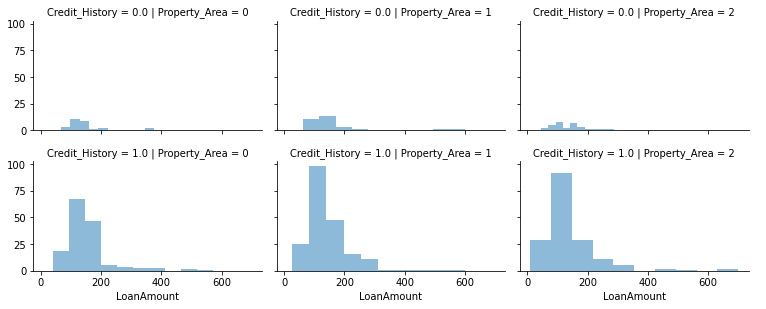

In [37]:
grid = sns.FacetGrid(df, row='Credit_History', col='Property_Area', size=2.2, aspect=1.6)
grid.map(plt.hist, 'LoanAmount', alpha=.5, bins=10)
grid.add_legend()

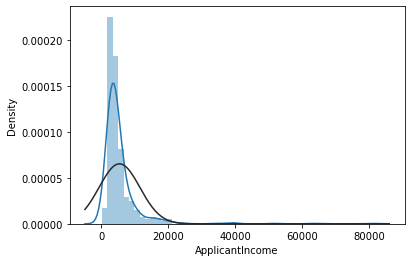

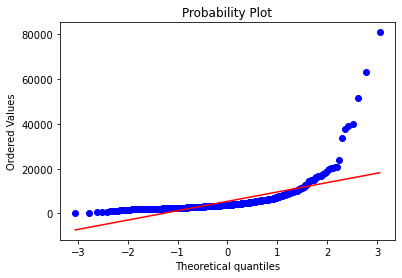

In [38]:
#histogram and normal probability plot
sns.distplot(df['ApplicantIncome'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['ApplicantIncome'], plot=plt)

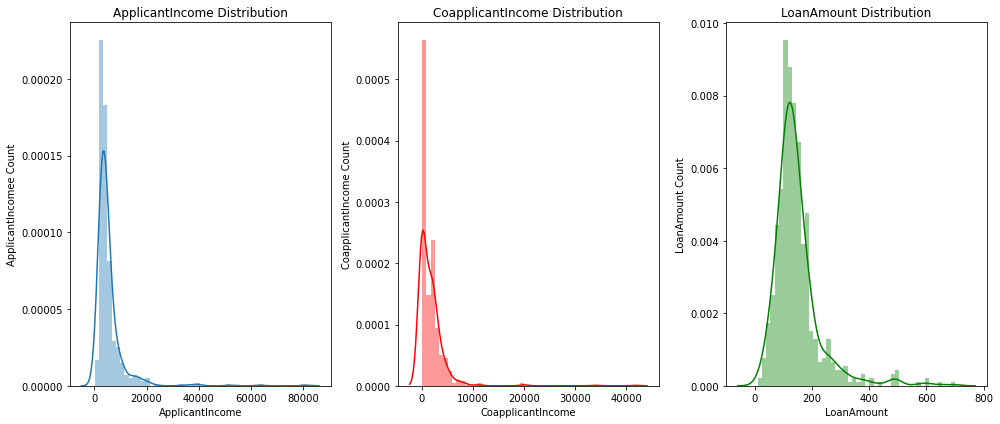

<Figure size 432x288 with 0 Axes>

In [39]:
flg, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14,6))

sns.distplot(df['ApplicantIncome'], ax = axes[0]).set_title('ApplicantIncome Distribution')
axes[0].set_ylabel('ApplicantIncomee Count')

sns.distplot(df['CoapplicantIncome'], color = "r", ax = axes[1]).set_title('CoapplicantIncome Distribution')
axes[1].set_ylabel('CoapplicantIncome Count')

sns.distplot(df['LoanAmount'],color = "g", ax = axes[2]).set_title('LoanAmount Distribution')
axes[2].set_ylabel('LoanAmount Count')

plt.tight_layout()
plt.show()
plt.gcf().clear()

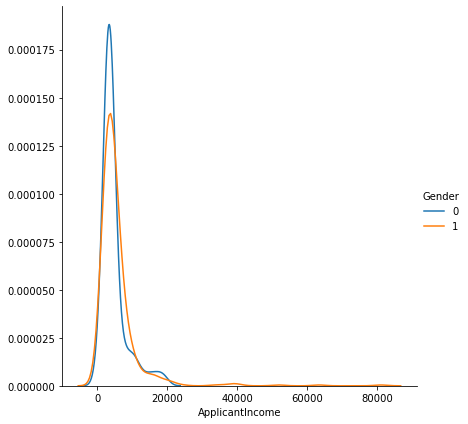

In [40]:
sns.FacetGrid(df, hue="Gender", size=6) \
   .map(sns.kdeplot, "ApplicantIncome") \
   .add_legend()

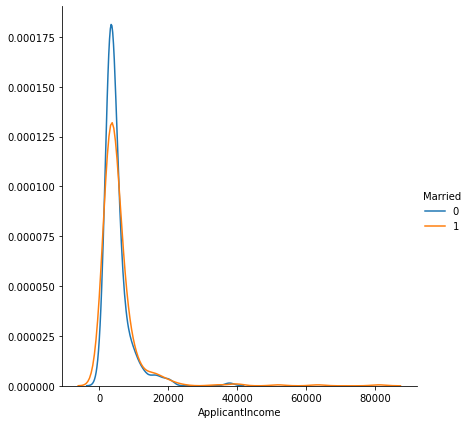

In [41]:
sns.FacetGrid(df, hue="Married", size=6) \
   .map(sns.kdeplot, "ApplicantIncome") \
   .add_legend()

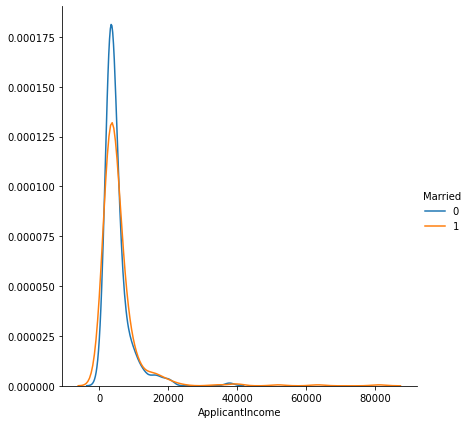

In [42]:
sns.FacetGrid(df, hue="Married", size=6) \
   .map(sns.kdeplot, "ApplicantIncome") \
   .add_legend()

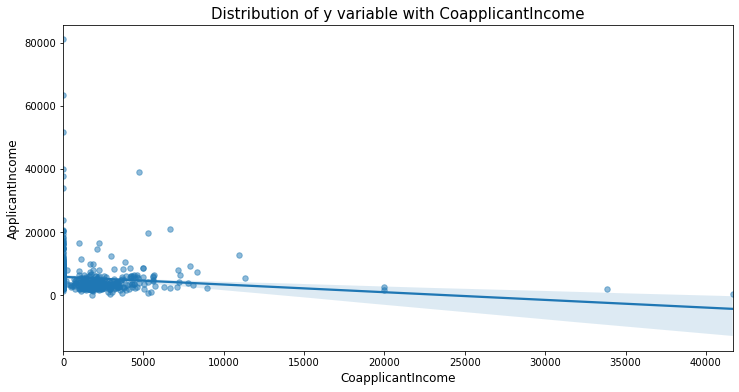

In [43]:
var_name = "CoapplicantIncome"
plt.figure(figsize=(12,6))
sns.regplot(x=var_name, y='ApplicantIncome', data=df, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('ApplicantIncome', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

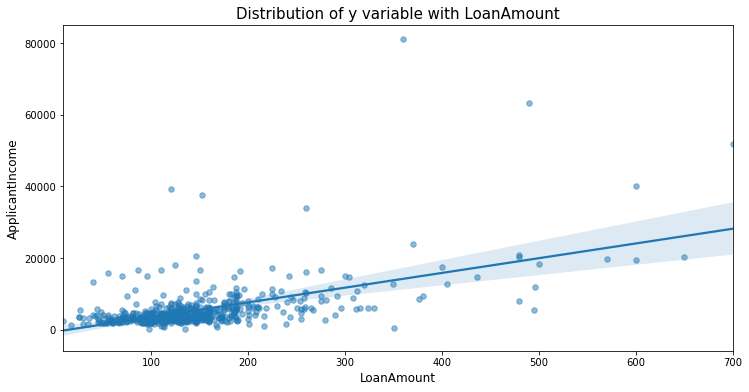

In [44]:
var_name = "LoanAmount"
plt.figure(figsize=(12,6))
sns.regplot(x=var_name, y='ApplicantIncome', data=df, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('ApplicantIncome', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

# Skewness

In [45]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

-we are first calculating the skew value and some of the column skew value are far from zero.
-The best skew value for normally distributes is very close to zero, so we are using “log1p” method to make the skew value near to zero

In [46]:
skew=('Gender','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [47]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.179713
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

# Correlation

In [48]:
df.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.045364,-0.000525,0.084501,0.220579,0.144167,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.012304,0.004489,0.021444,0.317095,0.180222,-0.100912,0.010938,0.004257,0.091478
Education,0.045364,0.012304,1.000000,-0.010383,-0.181735,0.043127,-0.144147,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,-0.010383,1.000000,0.189847,-0.092308,0.109890,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.084501,0.021444,-0.181735,0.189847,1.000000,-0.368258,0.492560,-0.031733,0.013482,-0.029501,0.010959
CoapplicantIncome,0.220579,0.317095,0.043127,-0.092308,-0.368258,1.000000,0.130524,0.014784,0.008274,-0.055183,0.060593
LoanAmount,0.144167,0.180222,-0.144147,0.109890,0.492560,0.130524,1.000000,0.084011,-0.019208,-0.092354,-0.042131
Loan_Amount_Term,-0.074030,-0.100912,-0.073928,-0.033739,-0.031733,0.014784,0.084011,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.073658,-0.001550,0.013482,0.008274,-0.019208,-0.004705,1.000000,0.001963,0.540556
Property_Area,-0.025752,0.004257,-0.065243,-0.030860,-0.029501,-0.055183,-0.092354,-0.076120,0.001963,1.000000,0.032112


<AxesSubplot:>

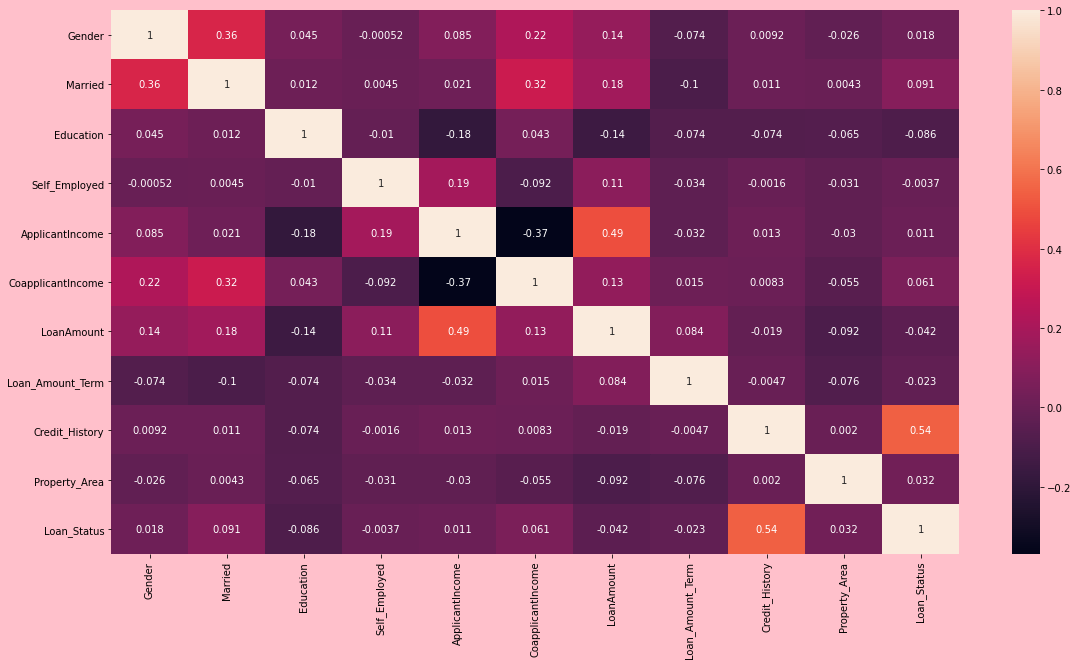

In [49]:
# plotting heatmap
plt.figure(figsize=[19,10],facecolor='pink')
sns.heatmap(df.corr(),annot=True)

By Correlation we will find the relation between different column to target column. 
Credit_History and Loan_Status column are highly corelated. Education and Loan_Status column are not corelated with each other.

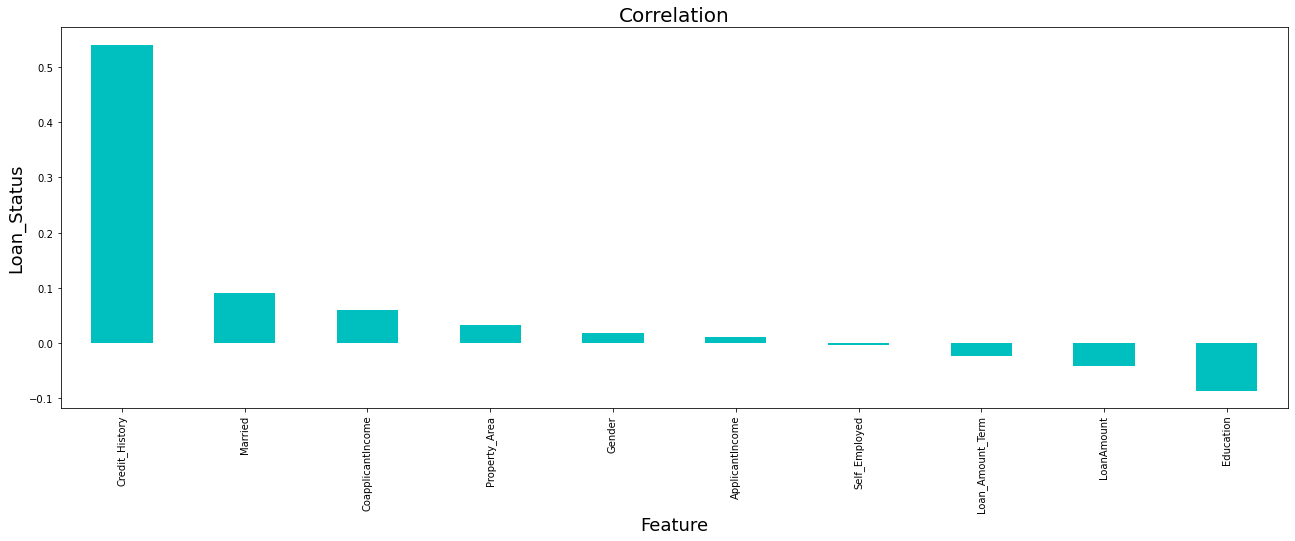

In [50]:
plt.figure(figsize=(22,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Loan_Status',fontsize=18)
plt.title('Correlation',fontsize=20)
plt.show()

By this we can say that Credit_History, married, CoapplicantIncome, PropertyArea, Gender, ApplicantIncome and Self_Emplyed are in positive relation and Loan_Amount_Term, LoanAmount and Education are in negative relation.

In [51]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0.000000,0.000000,8.674197,0.000000,4.993232,360.0,1.0,2,1
1,1,1,1,0.000000,0.000000,8.430327,7.319202,4.859812,360.0,1.0,0,0
2,1,1,0,0.000000,0.693147,8.006701,0.000000,4.204693,360.0,1.0,2,1
3,1,1,0,0.693147,0.000000,7.857094,7.765993,4.795791,360.0,1.0,2,1
4,1,0,0,0.000000,0.000000,8.699681,0.000000,4.955827,360.0,1.0,2,1


In [52]:
df.dtypes

Gender                 int32
Married                int32
Dependents            object
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [53]:
from sklearn.preprocessing import power_transform
df1=power_transform(df)

df=pd.DataFrame(df,columns=df.columns)

In [54]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df1))
z.shape

(614, 12)

In [55]:
threshold=3
print(np.where(z>3))

(array([ 14,  75,  94, 109, 130, 130, 133, 155, 155, 168, 171, 171, 179,
       183, 185, 188, 216, 228, 248, 293, 298, 333, 358, 366, 369, 378,
       409, 443, 468, 500, 500, 516, 555, 561, 568, 573, 600], dtype=int64), array([7, 8, 7, 8, 7, 8, 7, 5, 7, 8, 5, 7, 8, 5, 5, 5, 5, 8, 8, 8, 8, 5,
       8, 8, 7, 8, 5, 5, 5, 5, 8, 8, 7, 7, 7, 8, 5], dtype=int64))


In [56]:
len(np.where(z>3)[0])

37

In [57]:
df_new=df.drop([ 14,  75,  94, 109, 130, 130, 133, 155, 155, 168, 171, 171, 179,
       183, 185, 188, 216, 228, 248, 293, 298, 333, 358, 366, 369, 378,
       409, 443, 468, 500, 500, 516, 555, 561, 568, 573, 600 ],axis=0)
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0.000000,0.000000,8.674197,0.000000,4.993232,360.0,1.0,2,1
1,1,1,1,0.000000,0.000000,8.430327,7.319202,4.859812,360.0,1.0,0,0
2,1,1,0,0.000000,0.693147,8.006701,0.000000,4.204693,360.0,1.0,2,1
3,1,1,0,0.693147,0.000000,7.857094,7.765993,4.795791,360.0,1.0,2,1
4,1,0,0,0.000000,0.000000,8.699681,0.000000,4.955827,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0.000000,0.000000,7.972811,0.000000,4.276666,360.0,1.0,0,1
610,1,1,3,0.000000,0.000000,8.320448,0.000000,3.713572,180.0,1.0,0,1
611,1,1,1,0.000000,0.000000,8.996280,5.484797,5.537334,360.0,1.0,2,1
612,1,1,2,0.000000,0.000000,8.933796,0.000000,5.236442,360.0,1.0,2,1


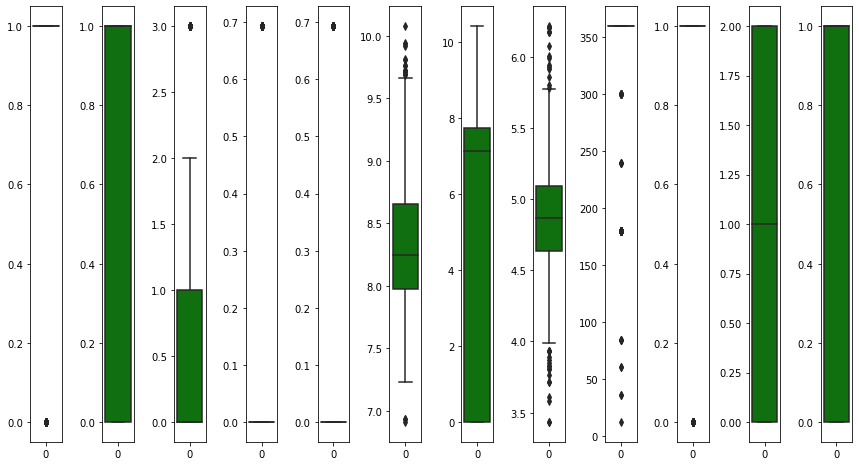

In [58]:
import seaborn as sns
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= df_new[collist[i]],color='green',orient='v')
    plt.tight_layout()

Outliers are present in LoanAmount and ApplicantIncome.

In [59]:
df=df_new

In [60]:
x = df.drop(columns = ['Loan_Status'],axis=1)
y = df['Loan_Status']

# Scalling the data using Min-Max Scaler

In [61]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
maxAcc=0
MaxRs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        MaxRs=i
print("Best Accuracy is",maxAcc,"on random state", MaxRs)
    

Best Accuracy is 0.8803418803418803 on random state 12


We saw that we get 88% accuracy at random state 12

In [64]:
def models(x_train, y_train):
    from sklearn.linear_model import LogisticRegression

    log = LogisticRegression(random_state = 12)
    log.fit(x_train, y_train)

    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p =2)
    knn.fit(x_train, y_train)

    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 12)
    svc_lin.fit(x_train, y_train)

    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 12)
    svc_rbf.fit(x_train, y_train)

    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(x_train, y_train)

    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state =12)
    tree.fit(x_train,y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=12)
    forest.fit(x_train,y_train)

    print('[0]Logistic Regression Training Accuracy:', log.score(x_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(x_train, y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(x_train, y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(x_train, y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(x_train, y_train))
    print('[5]Decision Tree Classsifier Training Accuracy:', tree.score(x_train, y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(x_train, y_train))

    return log, knn, svc_lin, svc_rbf, gauss, tree, forest


In [65]:
model = models(x_train,y_train)

[0]Logistic Regression Training Accuracy: 0.8125
[1]K Nearest Neighbor Training Accuracy: 0.7866379310344828
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.8103448275862069
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.6810344827586207
[4]Gaussian Naive Bayes Training Accuracy: 0.8081896551724138
[5]Decision Tree Classsifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9978448275862069


# Confusion Matrix

In [67]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(x_test))
    
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i, (TP + TN) / (TP + TN + FN +FP)))
    cr=classification_report(y_test,model[i].predict(x_test))
    print(cr)
    print('\n')

[[13 16]
 [ 2 86]]
Model[0] Testing Accuracy = "0.8461538461538461 !"
              precision    recall  f1-score   support

           0       0.87      0.45      0.59        29
           1       0.84      0.98      0.91        88

    accuracy                           0.85       117
   macro avg       0.85      0.71      0.75       117
weighted avg       0.85      0.85      0.83       117



[[ 8 21]
 [ 5 83]]
Model[1] Testing Accuracy = "0.7777777777777778 !"
              precision    recall  f1-score   support

           0       0.62      0.28      0.38        29
           1       0.80      0.94      0.86        88

    accuracy                           0.78       117
   macro avg       0.71      0.61      0.62       117
weighted avg       0.75      0.78      0.74       117



[[13 16]
 [ 2 86]]
Model[2] Testing Accuracy = "0.8461538461538461 !"
              precision    recall  f1-score   support

           0       0.87      0.45      0.59        29
           1       0.84

# Cross Validation

In [68]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x,y,cv=5)
print("cross validation score of LR is:",scr.mean())

cross validation score of LR is: 0.8175655761862659


In [69]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
scr=cross_val_score(rf,x,y,cv=5)
print("cross validation score of Random Forest Classifier is:",scr.mean())

cross validation score of Random Forest Classifier is: 0.7934718538166814


In [70]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
scr=cross_val_score(dt,x,y,cv=5)
print("cross validation score of Decision Tree Classifieris:",scr.mean())

cross validation score of Decision Tree Classifieris: 0.6919245505452403


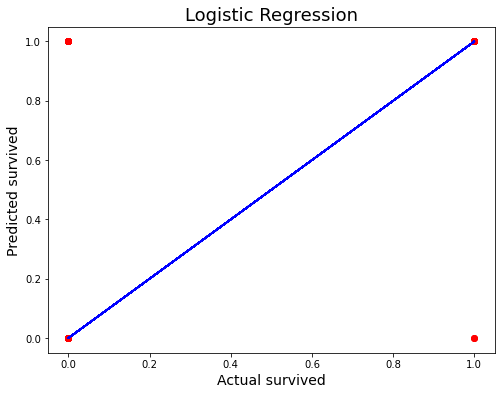

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predrf,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual survived',fontsize=14)
plt.ylabel('Predicted survived',fontsize=14)
plt.title('Logistic Regression',fontsize=18)
plt.show()

# Hyper Tunning Parameter

In [72]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [105]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2'}

In [106]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8461538461538461

# AUC-ROC Curve

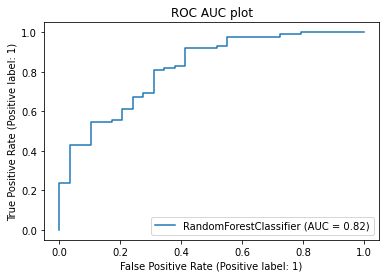

In [107]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

# Conclusion

In [108]:
import pickle
filename='Loan_pridiction.pkl'
pickle.dump(GCV.best_estimator_,open(filename,'wb'))

In [109]:
import pickle
loaded_model=pickle.load(open('Loan_pridiction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

84.61538461538461


In [110]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],GCV_pred[:]],index=["Predicted","original"])

In [111]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
Predicted,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
original,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1


# After training or testing the model with different Classifier. Almost all models are giving accuracy above 80%. But the Highest accuracy is given by RandomForest Classifier That is 84%. And we do Cross validation the Model gives 79% score for cross validation. AUC curve is also giving 82% .